# Semiconductor Project



In [77]:
import pandas as pd
import numpy as np
import sklearn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('uci-secom.csv')
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## Data Cleaning

In [79]:
df_clean = df.copy()
df_clean

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [80]:
df_clean = df_clean.drop('Time', axis=1)
df_clean

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


In [82]:
df_clean.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 591, dtype: object

In [83]:
df_clean.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### Check for NaN

In [84]:
df_clean.isna().sum()

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

In [85]:
pd.DataFrame(df_clean.isna().sum().sort_values(axis=0, ascending=False), columns=['Num_of_NaN']).head(10)

# pd.DataFrame because convert df_clean.isna().sum() from a series to a dataframe
# axis=0 means find nan for every row a one column
# axis=1 means find nan for every column in one row
# Python takes 0 as false so ascending=0 is also good

,Num_of_NaN
157,1429
292,1429
293,1429
158,1429
492,1341
358,1341
85,1341
220,1341
246,1018
109,1018


Have columns with up to 1429 rows with NaN, that's almost empty since each column has 1567 rows!

<break> 

Columns filled with more than 40% NaN values should be removed as not much info can be extracted out.

In [86]:
def remove_nan_columns(df_clean):
    total = 0
    for column in df_clean.columns:
        if df_clean[column].isna().sum() >= (len(df_clean.index) * 0.4):
            df_clean = df_clean.drop(column, axis=1)
            total += 1
    print(f'Number of columns dropped {total}')
    return df_clean

df_clean = remove_nan_columns(df_clean)
df_clean

Number of columns dropped 32


,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [87]:
pd.DataFrame(df_clean.isna().sum().sort_values(axis=0, ascending=False), columns=['Num_of_NaN']).head(10)

,Num_of_NaN
565,273
562,273
563,273
564,273
569,273
568,273
567,273
566,273
549,260
557,260


In [88]:
print(f'Highest percentage of NaN in remaining columns: {(273 / 1567) * 100}%')

Highest percentage of NaN in remaining columns: 17.42182514358647%


Remaining columns have a more acceptable percentage of NaN. The Pass/Fail column shouldn't have NaN as we have yet to train the model, checking is required. The rest of the NaN can be replaced with the median of the column.

In [89]:
# df_clean = df_clean.dropna(subset=['Pass/Fail'], axis = 0)
df_clean['Pass/Fail'].isna().sum()

# THESE DON'T WORK -> selects the Pass/Fail column from df_clean and keeps it as the new df_clean, so the new df_clean will only have Pass/Fail
# df_clean = df_clean['Pass/Fail'].dropna(axis=0)
# df_clean = df_clean.loc[:, 'Pass/Fail'].dropna(axis=0)

0

In [90]:
def replace_nan_with_median(df_clean):
    for column in df_clean:
        if df_clean[column].isna().sum() != 0:
            df_clean[column].fillna(df_clean[column].median(), inplace=True)
    return df_clean

df_clean = replace_nan_with_median(df_clean)
df_clean

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,-0.0013,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [91]:
pd.DataFrame(df_clean.isna().sum().sort_values(axis=0, ascending=False), columns=['Num_of_NaN']).head(10)

,Num_of_NaN
0,0
398,0
392,0
393,0
394,0
395,0
396,0
397,0
399,0
407,0


### Normalise data 
Normalization refers to rescaling real-valued numeric attributes to have a mean of 0 and standard deviation of 1 (z-score method)

Data normalization is used in machine learning to:
- make model training less sensitive to the scale of features
- allow our model to converge to better weights and, in turn, leads to a more accurate model
- make the features more consistent with each other, which allows the model to predict outputs more accurately

In [92]:
X = df_clean.loc[:, df_clean.columns!='Pass/Fail']
y = df_clean['Pass/Fail']

In [93]:
from sklearn.preprocessing import Normalizer

X_normalise = pd.DataFrame(Normalizer(norm='l2', copy=True).fit_transform(X))
X_normalise

,0,1,2,3,4,5,6,7,8,9,...,548,549,550,551,552,553,554,555,556,557
0,0.227023,0.192049,0.163866,0.105697,0.000102,0.007490,0.007311,0.000009,0.000112,1.213416e-06,...,0.000126,0.001120,0.000037,8.838464e-07,2.621578e-07,0.000177,1.535496e-06,1.108553e-06,3.445503e-07,0.005386
1,0.230239,0.183337,0.165881,0.108855,0.000062,0.007437,0.007611,0.000009,0.000111,-3.718601e-08,...,0.000082,0.000811,0.000037,1.658496e-06,4.090461e-07,0.000331,7.139713e-07,1.494877e-06,4.462321e-07,0.015485
2,0.211738,0.184830,0.157861,0.122599,0.000109,0.007220,0.006894,0.000009,0.000104,2.960245e-07,...,0.000151,0.000669,0.000036,1.133557e-06,2.815843e-07,0.000229,4.216544e-06,3.494533e-06,1.068576e-06,0.005983
3,0.215380,0.178712,0.158472,0.065564,0.000095,0.007206,0.007512,0.000009,0.000107,-8.935969e-07,...,0.000127,0.000619,0.000036,7.422620e-07,1.801607e-07,0.000148,1.455698e-06,1.073758e-06,3.170828e-07,0.005321
4,0.223356,0.184362,0.164511,0.097712,0.000113,0.007366,0.007395,0.000009,0.000111,-2.283471e-07,...,0.000122,0.000808,0.000035,3.510652e-05,7.697506e-06,0.007315,1.487939e-06,1.097539e-06,3.241055e-07,0.005439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.175782,0.149406,0.132150,0.187057,0.000090,0.006063,0.004986,0.000008,0.000081,-2.728208e-07,...,0.000090,0.000711,0.000030,8.669638e-07,2.364447e-07,0.000174,4.122625e-07,8.366503e-07,2.849461e-07,0.012318
1563,0.229566,0.189722,0.165355,0.084586,0.000066,0.007521,0.007406,0.000009,0.000108,-4.587845e-07,...,0.000077,0.001342,0.000037,9.852584e-07,2.707580e-07,0.000197,5.114319e-07,1.037906e-06,3.534897e-07,0.015281
1564,0.214304,0.171208,0.158728,0.079892,0.000059,0.007194,0.007152,0.000009,0.000105,-9.352581e-08,...,0.000088,0.001275,0.000036,1.100727e-06,2.949660e-07,0.000220,1.417276e-06,6.187092e-07,1.798573e-07,0.003131
1565,0.214760,0.187837,0.161503,0.087815,0.000117,0.007419,0.007329,0.000009,0.000108,-5.341325e-07,...,0.000127,0.001425,0.000037,1.320494e-06,2.819033e-07,0.000265,1.943649e-06,1.817534e-06,5.563880e-07,0.006936


In [94]:
# Z-SCORE NORMALISATION METHOD

# df_clean_normalise = df_clean.copy()

# for column in df_clean_normalise.columns:
#     df_clean_normalise[column] = (df_clean_normalise[column] -
#                            df_clean_normalise[column].mean()) / df_clean_normalise[column].std()    
   
# df_clean_normalise

## Feature Selection
Having too many features affects the performance of the machine learning model to accurately predict the outcome (curse of dimensionality). Variance Inflation Factor is done to measure the degree of multicollinearity. If high (VIF > 5), features should be dropped and dealt with using Principal Component Analysis (PCA).

### Variance Inflation Factor (VIF)

In [95]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X_normalise):
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_normalise.columns
    vif_data["VIF"] = [variance_inflation_factor(X_normalise.values, i) for i in range(len(X_normalise.columns))]
    
    high_vif = vif_data[vif_data["VIF"] > 5].sort_values("VIF",ascending=False)

    return(high_vif.head(10))

calc_vif(X_normalise)

/Users/szelin/opt/anaconda3/envs/venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/szelin/opt/anaconda3/envs/venv/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
69,69,inf
455,455,inf
72,72,inf
329,329,inf
42,42,inf
5,5,inf
326,326,inf
49,49,inf
200,200,inf
197,197,inf


### Principal Component Analysis (PCA)
1. Standardize the range of continuous initial variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep
5. Recast the data along the principal components axes

- Only apply PCA to continuos variables, not categorical

References: 
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6#:~:text=The%20explained%20variance%20ratio%20is,or%2080%25%20to%20avoid%20overfitting

#### Covariance 
- Covariance evaluates how the mean values of two random variables move together
- When two stocks tend to move together, they are seen as having a positive covariance; when they move inversely, the covariance is negative
- Different from correlation! Covariance does not show the strength of the relationship between the two assets unlike Correlation Coefficient

#### Eigenvectors and Eigenvalues
- Eigenvectors represent the principal components 
- Eigenvalues represent the variance of the principal components
- Eigendecomposition brings the power of the covariance matrix (or any matrix) down so that the computational load is smaller
- Need it to compute Explained Variance Ratio

#### Explained Variance
- Statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by a PCA (eigenvalue / total eigenvalues)
- Layman: Tells us how much the total variance is "explained" by each component
- Allows us to rank the importance of the components + Used to compare different PCA models
- https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20a%20statistical,to%20each%20individual%20principal%20component

In [96]:
# Creating a covariance matrix
cov_matrix = np.cov(X_normalise.T)
      
# Perform an eigendecomposition on the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix) 

In [97]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_normalise.shape[1],random_state=1).fit(X_normalise.values)
a = np.cumsum(pca.explained_variance_ratio_)

i = 0
while a[i] < 0.9:
    i = i+1
f'Number of dimensions needed to capture 90%% of variance: {i}'

'Number of dimensions needed to capture 90%% of variance: 3'

In [99]:
# PCA with reduced number of components

pca = PCA(n_components=i,random_state=1)
pca.fit(X_normalise)
# print(pca.components_)

pca_df = pd.DataFrame(pca.fit_transform(X_normalise))

In [100]:
pca_df.shape

(1567, 3)

In [101]:
pca_df

,0,1,2
0,-0.272527,-0.174544,0.048916
1,-0.018362,-0.257767,-0.099497
2,-0.120600,-0.221133,-0.129340
3,-0.048881,-0.017876,-0.119404
4,-0.190397,-0.137119,0.002805
...,...,...,...
1562,-0.223975,0.212785,-0.010067
1563,-0.266430,-0.233652,0.027964
1564,-0.179957,0.014614,-0.103709
1565,-0.216338,-0.056126,0.014195


Using PCA, the number of features dropped from 558 to 3! Based on the very low correlation score, it shows that the features 0, 1, and 2 are independent. This is a good sign to start working on with Machine Learning. 

## Machine Learning and Model Evaluation
Logistic regression is performed on the dataset and we look at the F1 score and Matthews Correlation Coefficient (MCC) to evaluate the performance of the model. 

### Logistic Regression
Logistic Regression gives a prediction based on the independent variables given. Since the features are not yet sorted out, the prediction will not be accurate. Logistic Regression, used hand-in-hand with F1 score and MCC, allows us to estimate how independent the features selected will be. 

- supervised machine learning
- predict binary outcome
- discriminative model, which means that it attempts to distinguish between classes (or categories)
- advantages and disadvantages: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

### F1 score 
- F1 score is the harmonic mean between precision and recall
- F1 score ranges 0 to 1, where 0 is the worst performance while 1 is the best performance
- Performance refers to the accuracy of prediction
- Disadvantage: Ignores true negatives which is misleading in unbalanced datasets. Places equal importance on precision and recall.
- What makes a good f1-score: https://inside.getyourguide.com/blog/2020/9/30/what-makes-a-good-f1-score

### Matthews Correlation Coefficient (MCC)
- MCC determines the correlation between true class and predicted class. The greater the correlation between the true class and predicted class, the more accurate the model
- MCC = 1 (Perfect classification)
- MCC = -1 (Perfect misclassification)
- MCC = 0 (Predicts with a 50-50 chance)

In [102]:
X_logreg = pca_df.copy()
# recall that y = df_clean['Pass/Fail']

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_logreg, y, test_size=0.33, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [105]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# print(metrics.classification_report(y_test, y_pred))

f1_score_train = f1_score(y_train, y_train_pred, average="micro")
f1_score_test = f1_score(y_test, y_test_pred, average="micro")

print(f"F1 score of train dataset: {f1_score_train}")
print(f"F1 score of test dataset: {f1_score_test}")

F1 score of train dataset: 0.9313632030505243
F1 score of test dataset: 0.9382239382239382


In [106]:
from sklearn.metrics import matthews_corrcoef

mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print(f"MCC score of train dataset: {mcc_train}")
print(f"MCC score of test dataset: {mcc_test}")

MCC score of train dataset: 0.0
MCC score of test dataset: 0.0


Text(452.23636363636354, 0.5, 'True')

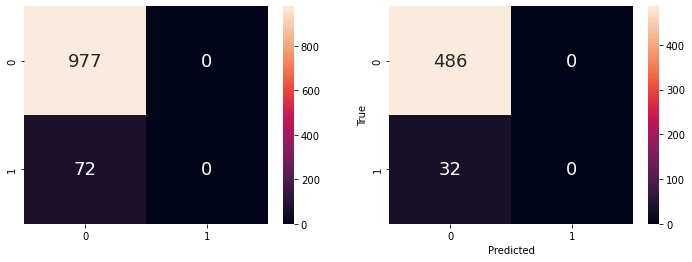

In [107]:
import seaborn as sb
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

plt.xlabel('Predicted')
plt.ylabel('True')

In [108]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy score of train dataset: {accuracy_train}")
print(f"Accuracy score of test dataset: {accuracy_test}")

Accuracy score of train dataset: 0.9313632030505243
Accuracy score of test dataset: 0.9382239382239382


As we can observe, we get a high F1 score of 0.931 and 0.938 for both the train and test datasets, which is very close to one. This means that the Logistic Regression model can almost perfectly classify each observation into the correct Pass/Fail outcome. However, it also yields MCC=0 for both train and test datasets, this means that the model is no better than a random flip of a coin. This is puzzling as the two scores contradict each other.

To explore what is issue, the confusion matrix is plotted. From the confusion matrix of the train and test datasets, True Positives and False Positives are 0. Since MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN), the numerator and denominator will both be 0. Hence, MCC may not be a good model evaluator in this case. 

Further examining the model using the accuracy score, we find that the accuracy score for both the train and test datasets are the same as the corresponding F1 score. 

### Logistic Regression without PCA (only normalised data)

In [109]:
X_normalise

,0,1,2,3,4,5,6,7,8,9,...,548,549,550,551,552,553,554,555,556,557
0,0.227023,0.192049,0.163866,0.105697,0.000102,0.007490,0.007311,0.000009,0.000112,1.213416e-06,...,0.000126,0.001120,0.000037,8.838464e-07,2.621578e-07,0.000177,1.535496e-06,1.108553e-06,3.445503e-07,0.005386
1,0.230239,0.183337,0.165881,0.108855,0.000062,0.007437,0.007611,0.000009,0.000111,-3.718601e-08,...,0.000082,0.000811,0.000037,1.658496e-06,4.090461e-07,0.000331,7.139713e-07,1.494877e-06,4.462321e-07,0.015485
2,0.211738,0.184830,0.157861,0.122599,0.000109,0.007220,0.006894,0.000009,0.000104,2.960245e-07,...,0.000151,0.000669,0.000036,1.133557e-06,2.815843e-07,0.000229,4.216544e-06,3.494533e-06,1.068576e-06,0.005983
3,0.215380,0.178712,0.158472,0.065564,0.000095,0.007206,0.007512,0.000009,0.000107,-8.935969e-07,...,0.000127,0.000619,0.000036,7.422620e-07,1.801607e-07,0.000148,1.455698e-06,1.073758e-06,3.170828e-07,0.005321
4,0.223356,0.184362,0.164511,0.097712,0.000113,0.007366,0.007395,0.000009,0.000111,-2.283471e-07,...,0.000122,0.000808,0.000035,3.510652e-05,7.697506e-06,0.007315,1.487939e-06,1.097539e-06,3.241055e-07,0.005439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.175782,0.149406,0.132150,0.187057,0.000090,0.006063,0.004986,0.000008,0.000081,-2.728208e-07,...,0.000090,0.000711,0.000030,8.669638e-07,2.364447e-07,0.000174,4.122625e-07,8.366503e-07,2.849461e-07,0.012318
1563,0.229566,0.189722,0.165355,0.084586,0.000066,0.007521,0.007406,0.000009,0.000108,-4.587845e-07,...,0.000077,0.001342,0.000037,9.852584e-07,2.707580e-07,0.000197,5.114319e-07,1.037906e-06,3.534897e-07,0.015281
1564,0.214304,0.171208,0.158728,0.079892,0.000059,0.007194,0.007152,0.000009,0.000105,-9.352581e-08,...,0.000088,0.001275,0.000036,1.100727e-06,2.949660e-07,0.000220,1.417276e-06,6.187092e-07,1.798573e-07,0.003131
1565,0.214760,0.187837,0.161503,0.087815,0.000117,0.007419,0.007329,0.000009,0.000108,-5.341325e-07,...,0.000127,0.001425,0.000037,1.320494e-06,2.819033e-07,0.000265,1.943649e-06,1.817534e-06,5.563880e-07,0.006936


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_normalise, y, test_size=0.33, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [112]:
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# print(metrics.classification_report(y_test, y_pred))

f1_score_train = f1_score(y_train, y_train_pred, average="micro")
f1_score_test = f1_score(y_test, y_test_pred, average="micro")

print(f"F1 score of train dataset: {f1_score_train}")
print(f"F1 score of test dataset: {f1_score_test}")

F1 score of train dataset: 0.9313632030505243
F1 score of test dataset: 0.9382239382239382


In [113]:
from sklearn.metrics import matthews_corrcoef

mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print(f"MCC score of train dataset: {mcc_train}")
print(f"MCC score of test dataset: {mcc_test}")

MCC score of train dataset: 0.0
MCC score of test dataset: 0.0


Text(452.23636363636354, 0.5, 'True')

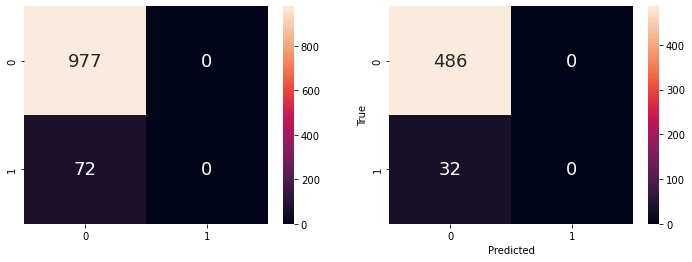

In [114]:
import seaborn as sb
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

plt.xlabel('Predicted')
plt.ylabel('True')

It is noted that for this dataset, PCA does not offer any help in making the model more accurate. This could be because features 0, 1, and 2 are so significant (explained variance ratio > 0.9). The rest of the features are noise that do not play a large role in affecting outcome.

# Takeaways

1. Clean NaN, dtypes, normalise
2. Feature selection, Multicollinearity (PCA)
3. Machine Learning, Logistic Regression

#### Guides
- https://www.kaggle.com/code/halflingwizard/feature-selection-from-600-to-17-features
- https://www.kaggle.com/code/arparashar/100-accuracy-using-pca-hypertuning-imbalanced-data

#### Preserve original df and create a copy

#### Normalize data
- equal weightage
- Normalization Techniques: https://developers.google.com/machine-learning/data-prep/transform/normalization

#### Principal Component Analysis
- 

#### Evaluation metrics
- Don't use accuracy if dataset is unbalanced e.g. lots of empty boxes in columns
- F1 score, Matthews Corrrelation Coefficient (MCC) are good for imbalanced datasets
- F1 Score vs ROC AUC vs Accuracy vs PR AUC: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

#### Extra readings
- The Ultimate Guide to Evaluation and Selection of Models in Machine Learning: https://neptune.ai/blog/the-ultimate-guide-to-evaluation-and-selection-of-models-in-machine-learning